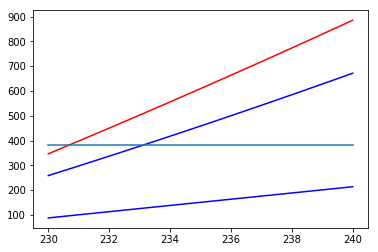

284.0774746290154
380.6536548386031
0.048956314390049396
271.3172113790322


In [39]:
import numpy as np
import matplotlib.pyplot as plt

#m in kg (wikipedia)
m = 500
# SA - rough surface area estimate (m**2)
SA = 6
#Kleiber's Law BMR
BMR_k = 3.6*m**(3/4)

BMR = BMR_k

#One Layer Conduction Model
T_body = 310
T_air = 223
delta_t = T_air - T_body
kappa_f = 0.0357
#https://thermtest.com/applications/fur-thermal-conductivity-hfm
delta_x = -(kappa_f*delta_t*SA)/BMR

#Radiation Loss in Water
T_water = 271 #K
sigma = 5.67*10**(-8)
epsilon = 1

T_bear = (BMR/(SA*sigma)+T_water**4)**(1/4)

#Heat Loss in Water (Surface Heat Transfer)
# h_s of water in free convection ranges from 100-1000
h_sw = 200
T_fur = T_water + (BMR/(h_sw * SA))

# Model 1: No Convection
# conduction
rho_p = 1000
V= m/rho_p
r = (3*V*np.pi/4)**(1/3)
SA_2 = 4*np.pi*r**2
paw_area = .2
kappa_2 = 0.050 * paw_area/(SA_2)
#T_1 = T_air + BMR/(4*np.pi*r*kappa_2)

T_1 = np.linspace(230, 240, 100)
p_rad = sigma*4*np.pi*(r**2)*(T_1**4 - T_air**4)
#p_cond = (T_1-T_air)*4*np.pi*kappa_2
p_cond = (T_1-T_air)*4*np.pi*1
p_tot = p_rad+p_cond
y = T_1*0 + BMR

plt.plot(T_1, p_rad, 'b')
plt.plot(T_1, p_cond, 'b')
plt.plot(T_1, p_tot, 'r')
plt.plot(T_1, y)
plt.show()
print(T_bear)
print(BMR)
print(delta_x)
print(T_fur)
